Hi Deep Learning - BWF, you just got hired at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple csv files. They didn’t use pandas, they would just look through these csv files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts. The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms? Inspect the Data! 

- The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.
- Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?
- It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?
- Using glob, loop through the census files available and load them into DataFrames or maybe load them separately in different DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.
- Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?
- Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.
- Start to make a plan for how to convert these columns into the right types for manipulation.
- Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column. Split the column into those two new columns using str.split and separating out those results. Convert both of the columns into numerical datatypes.
- There is still an M or an F character in each entry! We should remove those before we convert.
- Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!
- Use matplotlib to make a scatterplot!
- plt.scatter(the_women_column, the_income_column) Remember to call plt.show() to see the graph!
- Did you get an error? These monstrous csv files probably have nan or null values in them! Print out your column with the number of women per state to see.
- We can fill in those nans by using pandas’ .fillna() function.
- You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.
- Print out the Women column after filling the nan values to see if it worked!
- We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.
- Drop those duplicates using the .drop_duplicates() function.
- Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.
- Histograms of Races. Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.
- Try to make a histogram for each one!
- You will have to get the columns into numerical format, and those percentage signs will have to go.
- Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.
- Phew. You’ve definitely impressed your boss on your first day of work.

In [1]:
import glob
import pandas as pd

# Reading, Combining and Preprocessing

## Reading 
Reading all the csv files and saving it in list

In [4]:
# create an empty list to hold the DataFrames
dfs = []

# loop through the csv files and load them into DataFrames
for filename in glob.glob('US_Census/*.csv'):
    df = pd.read_csv(filename, index_col=None, header=0)
#     df = df.drop("Unnamed: 0", axis=1)
    dfs.append(df)

## Combining and Saving

In [5]:
us_census = pd.concat(dfs, ignore_index=True)

us_census.to_csv("US_Census/data.csv", index=False)

In [6]:
us_census = pd.read_csv("US_Census/data.csv", index_col=None, header=0)
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Unnamed: 0
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F,NaN
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F,NaN
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F,NaN
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F,NaN
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F,1.0
296,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F,2.0
297,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F,3.0
298,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F,4.0


## Preprocessing

checking for imbiguity and cleaning the data and converting it to suitable form
Also replacing Nan values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6 non-null      int64 
 1   State       6 non-null      object
 2   TotalPop    6 non-null      int64 
 3   Hispanic    6 non-null      object
 4   White       6 non-null      object
 5   Black       6 non-null      object
 6   Native      6 non-null      object
 7   Asian       6 non-null      object
 8   Pacific     6 non-null      object
 9   Income      6 non-null      object
 10  GenderPop   6 non-null      object
dtypes: int64(2), object(9)
memory usage: 656.0+ bytes


### Spliting GenderPop to two different Columns
Gender Props are the number of Male and Females in specific state

In [8]:
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split('_', expand=True)

### Now Converting the Data to floating value for both Male and Female

In [9]:
us_census["Men"] = us_census["Men"].str.replace("M", '').astype(float)

In [10]:
us_census['Women'] = pd.to_numeric(us_census['Women'].str.replace('F', ''), errors='coerce')

In [11]:
non_convertible = us_census[pd.isnull(us_census['Women'])]
non_convertible

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Unnamed: 0,Men,Women
23,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F,NaN,2872643.0,NaN
24,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F,NaN,2872643.0,NaN
31,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,$47645.682835820895,510163M_F,NaN,510163.0,NaN
83,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F,NaN,2872643.0,NaN
84,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F,NaN,2872643.0,NaN
91,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,$47645.682835820895,510163M_F,NaN,510163.0,NaN
143,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F,NaN,2872643.0,NaN
144,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F,NaN,2872643.0,NaN
151,Montana,1014699,3.2688888888888896%,86.41555555555554%,0.4292592592592591%,7.0607407407407425%,0.5703703703703705%,0.07222222222222222%,$47645.682835820895,510163M_F,NaN,510163.0,NaN
203,Maryland,5930538,8.47249820014399%,52.679049676026%,30.6777537796976%,0.20309575233981278%,5.325413966882652%,0.03628509719222463%,$78765.40072463769,2872643M_F,NaN,2872643.0,NaN


### Filling Null Values

In [12]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])

### Converting Columns to float

In [13]:
cols = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in cols:
    us_census[col] = pd.to_numeric(us_census[col].str.strip('%'), errors='coerce')
    us_census[col] = us_census[col].fillna(us_census[col].mean())

In [14]:
us_census

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Unnamed: 0,Men,Women
0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,$43296.35860306644,2341093M_2489527F,NaN,2341093.0,2489527.0
1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,$70354.74390243902,384160M_349215F,NaN,384160.0,349215.0
2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,$54207.82095490716,3299088M_3342840F,NaN,3299088.0,3342840.0
3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,$41935.63396778917,1451913M_1506295F,NaN,1451913.0,1506295.0
4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,$67264.78230266465,19087135M_19334329F,NaN,19087135.0,19334329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Vermont,626604,1.609290,93.983060,0.980874,0.301639,1.238798,0.030601,$55602.96721311475,308573M_318031F,1.0,308573.0,318031.0
296,Virginia,8256630,8.011016,63.271048,20.175998,0.212453,5.455242,0.064715,$72866.01341201717,4060948M_4195682F,2.0,4060948.0,4195682.0
297,Washington,6985464,11.140969,72.038408,3.384429,1.410727,7.022007,0.609896,$64493.76768377254,3487725M_3497739F,3.0,3487725.0,3497739.0
298,West Virginia,1851420,1.290909,92.176240,3.662810,0.152686,0.682438,0.026446,$41437.11157024794,913631M_937789F,4.0,913631.0,937789.0


### Converting Income to Float

In [15]:
us_census['Income'] = us_census['Income'].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Muhammad_Haseeb\AppData\Local\Temp\ipykernel_4768\381659990.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  us_census['Income'] = us_census['Income'].str.replace('$', '').str.replace(',', '').astype(float)


### Dropping GenderPop
Since it is no longer relevant

In [16]:
us_census = us_census.drop(columns=['GenderPop'])

In [17]:
us_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       300 non-null    object 
 1   TotalPop    300 non-null    int64  
 2   Hispanic    300 non-null    float64
 3   White       300 non-null    float64
 4   Black       300 non-null    float64
 5   Native      300 non-null    float64
 6   Asian       300 non-null    float64
 7   Pacific     300 non-null    float64
 8   Income      300 non-null    float64
 9   Unnamed: 0  60 non-null     float64
 10  Men         300 non-null    float64
 11  Women       300 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 28.2+ KB


### Handling  Null Values

In [18]:
us_census.isnull().sum()

State           0
TotalPop        0
Hispanic        0
White           0
Black           0
Native          0
Asian           0
Pacific         0
Income          0
Unnamed: 0    240
Men             0
Women           0
dtype: int64

In [19]:
us_census = us_census.drop('Unnamed: 0', axis=1)

# Visualization

In [20]:
import matplotlib.pyplot as plt

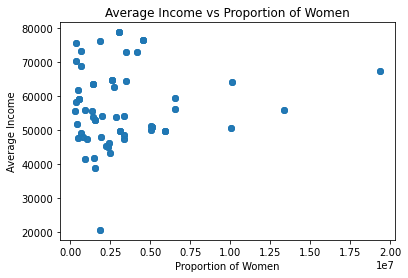

In [21]:
# Create scatterplot
plt.scatter(us_census['Women'], us_census['Income'], alpha=0.5)
plt.title('Average Income vs Proportion of Women')
plt.xlabel('Proportion of Women')
plt.ylabel('Average Income')

# Show plot
plt.show()


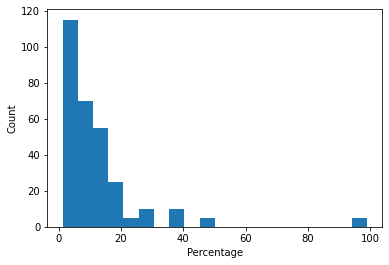

In [22]:
plt.hist(us_census['Hispanic'], bins=20)
plt.xlabel('Percentage')
plt.ylabel('Count')

plt.show()

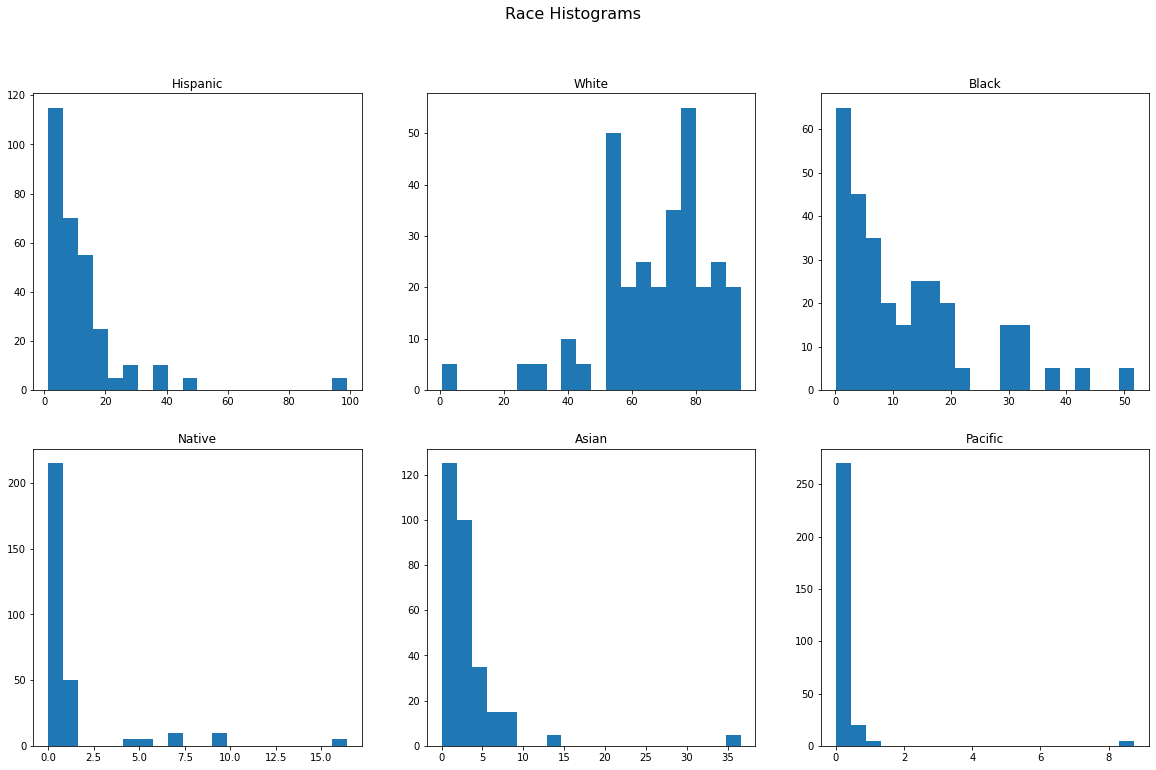

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
for i, race in enumerate(cols):
    ax = axs[i//3, i%3] 
    ax.hist(us_census[race], bins=20)
    ax.set_title(race) 

fig.suptitle("Race Histograms", fontsize=16)

plt.show()